# DS-SF-36 | Unit Project | 1 | Research Design | Starter Code

In this first unit project, you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: The outcome is the free-tier customers indicators: a pattern of free-tier customers who will covert to paying customers

> ### Question 2.  What are the predictors/covariates?

Answer: Demographic data collected at signup such as: age, gender, location, and profession & customer useage data such as: days since last log in, and activity score

> ### Question 3.  What timeframe is this data relevent for?

Answer: January-April 2015

> ### Question 4.  What is the hypothesis?

Answer: Hypothesis is the demographic & customer usage data can allow us to find out a pattern of free-tier customers who will covert to paying customers

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [8]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [3]:
df[df.admit ==1].mean()

admit         1.000000
gre         618.897638
gpa           3.489206
prestige      2.150794
dtype: float64

In [4]:
df[df.admit ==0].mean()

admit         0.000000
gre         573.579336
gpa           3.345404
prestige      2.641026
dtype: float64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

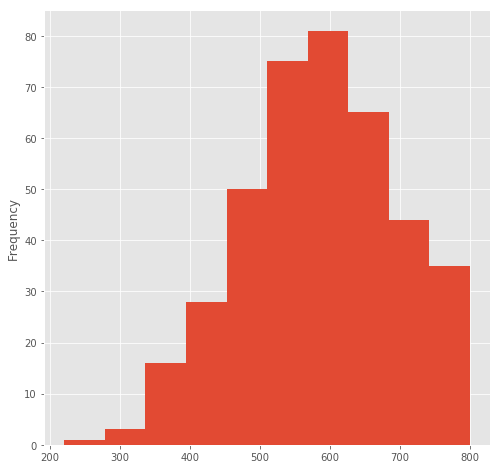

In [25]:
df.gre.plot(kind = 'hist', figsize = (8, 8))

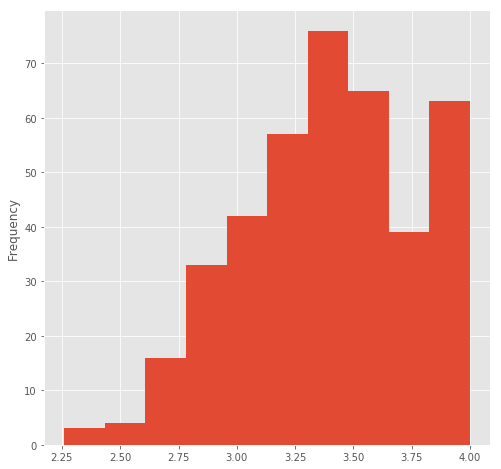

In [26]:
df.gpa.plot(kind = 'hist', figsize = (8, 8))

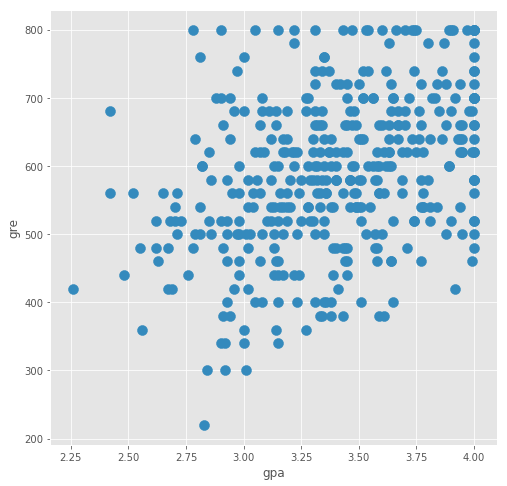

In [27]:
df.plot(kind = 'scatter', x = 'gpa', y = 'gre', s = 100, figsize = (8, 8))

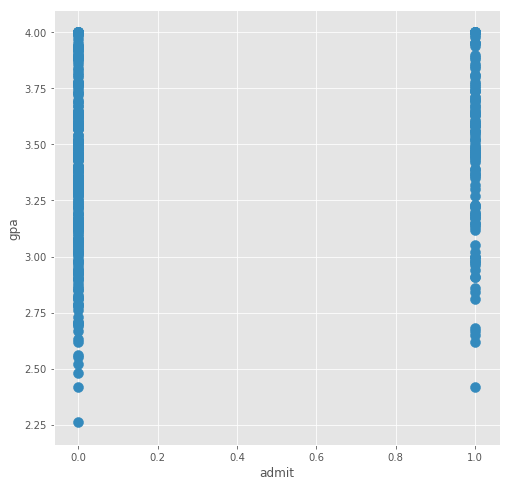

In [28]:
df.plot(kind = 'scatter', x = 'admit', y = 'gpa', s = 100, figsize = (8, 8))

> ### Question 5.  Create a data dictionary.

Answer: TODO

(Use the template below)

Variable | Description | Type of Variable
---|---|---
Var 1 | 0 = Not thing, 1 = Thing | Categorical
Var 2 | Thing in unit X | Continuous

In [10]:
df.set_index('admit').to_dict()

{'gpa': {0: 3.8900000000000001, 1: 3.9900000000000002},
 'gre': {0: 600.0, 1: 460.0},
 'prestige': {0: 3.0, 1: 3.0}}

We would like to explore the association between X and Y.

In [13]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 6.  What is the outcome?

Answer: 
gre & gpa have positive association. It indicates that a student with higher gpa score seems to get higher score in gre as well. However the relationship is not very strong, but rather weak. 
The correlation between gre, gpa & admit suggests that higher scores a student has, higher chance he/she can get admit to the school but these are not the main factors.
previous school prestige score has negative association to all other factors. This is due to the fact that prestige score is ranking in the opposite order as compared to gre & gpa. 

> ### Question 7.  What are the predictors/covariates?

Answer: GRE,GPA,PRESTIGE

> ### Question 8.  What timeframe is this data relevent for?

Answer: After admission session

> ### Question 9.  What is the hypothesis?

Answer: Hypothesis is school admission approval can be made based on application data such as GRE, GPA and prestige of a student

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: 
Define the application that got approved based on application data such as GRE, GPA and prestige

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer: The primary goal of EDA is to maximize the analyst's insight into a data set and into the underlying structure of a data set, while providing all of the specific items that an analyst would want to extract from a data set, such as: a good-fitting, parsimonious model a list of outliers a sense of robustness of conclusions estimates for parameters uncertainties for those estimates a ranked list of important factors conclusions as to whether individual factors are statistically significant optimal settings
src: http://www.itl.nist.gov/div898/handbook/eda/section1/eda14.htm

> ### Question 12.  What are the assumptions of the distribution of data?

Answer: Data will fit some kind of trend and that most things will fit into a "normal" range. This is why we look at measures of central tendency, such as the mean, median and mode, and talk about the normal distribution.

> ### Question 13.  How will determine the distribution of your data?

Answer: 
The distribution is a summary of the frequency of individual values or ranges of values for a variable. The simplest distribution would list every value of a variable and the number of persons who had each value.
The distribution of data is determined based on the measures of central tendency: mean, median, mode. tandard deviation, quartiless. Outliners also play an important role in shaping the distribution if they are considered. 
The most popular distribution is normal distribution where mean & median are equal.

> ### Question 14.  How might outliers impact your analysis?

Answer: Outliners affect mostly on the mean and standard deviation of a data set but not so much on mode and median. Outliners can skew or change the shape of the data

> ### Question 15.  How will you test for outliers?

Answer: The interquartile range, IQR = Q3 – Q1, can be used as a measure of how spread-out the values are. If a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable. These are outliers.

> ### Question 16.  What is colinearity?

Answer: collinearity is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy

> ### Question 17.  How will you test for covariance?

Answer: TODO


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: 
Most of applications have gpa score between 3-3.75, and gre spreaded between 500 - 700. The average gre of student who get admit are around 618. Gre & Gpa are positively associated to admission status. The higher these score, the higher chance students get admit. Data also show that students from school with higher pretige rank tend to have higher gre score; Hence, seems to have higher chance to get admit. 